In [2]:
import numpy as np
import pandas as pd
m2 = pd.read_csv('data_clustering.csv',dtype={'CLNT_ID':str})
m2=m2[['ACTIVE_DAYS', 'N_LOGIN', 'PURCHASE_CYCLE', 'SESS_SEQ',
       'TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V', 'TOTAL_BUY_AM_x', 'TOTAL_BUY_AM_y',
       'TOTAL_CT', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3',
       'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9',
       'CLNT_GENDER', 'CLNT_AGE']]
CUSM2=pd.read_csv('data_regression.csv',dtype={'CLNT_ID':str})
CUSM2=CUSM2.loc[:,'CLNT_ID']
m2.index=CUSM2.index
m2=pd.concat([CUSM2, m2], axis=1)
m2.head()

,CLNT_ID,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,...,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER,CLNT_AGE
0,0000008,118,2,59.0,4.5,46.500000,417.000000,38000.000000,76000,2,...,0,0,0,0,0,0,2,0,M,20
1,0000014,20,1,20.0,5.0,256.000000,7098.000000,34900.000000,69800,2,...,0,0,0,0,0,0,2,0,F,30
2,0000032,20,2,10.0,101.4,98.200000,2169.000000,15360.000000,76800,5,...,0,0,0,0,0,0,5,0,M,40
3,0000056,97,2,48.5,82.0,45.666667,1157.666667,7933.333333,23800,3,...,0,0,0,0,1,0,0,2,F,40
4,0000058,74,1,74.0,8.0,195.000000,3161.000000,21850.000000,131100,6,...,0,1,0,0,0,0,5,0,F,30


In [80]:
# Table of age vs. sex
cusinfo_table = pd.crosstab(index=m2["CLNT_GENDER"], 
                           columns=m2["CLNT_AGE"])
cusinfo_table.index= ["Female","Male"]
cusinfo_table

CLNT_AGE,10,20,30,40,50,60,70,80
Female,3007,82244,271628,180352,28874,3784,541,23
Male,800,13019,41865,35809,7741,1471,303,9


In [81]:
cusinfo_table.iloc[0]

CLNT_AGE
10      3007
20     82244
30    271628
40    180352
50     28874
60      3784
70       541
80        23
Name: Female, dtype: int64

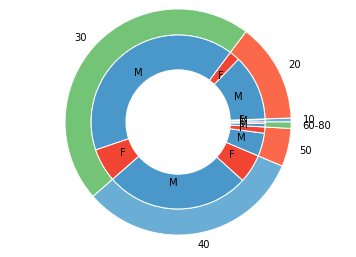

In [4]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=['10','20','30','40','50','60-80']
group_size=[3807,95263,313493,216161,36615,6131]
subgroup_names=['M','F','M','F','M','F','M','F','M','F','M','F']
subgroup_size=[3007,800,82244,13019,271628,41865,180352,35809,28874,7741,4348,1783]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.5), b(0.5), c(0.5)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, 
                   colors=[a(0.6),b(0.6),a(0.6),b(0.6),a(0.6),b(0.6),a(0.6),b(0.6),a(0.6),b(0.6),a(0.6),b(0.6),a(0.6),b(0.6),a(0.6),b(0.6)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

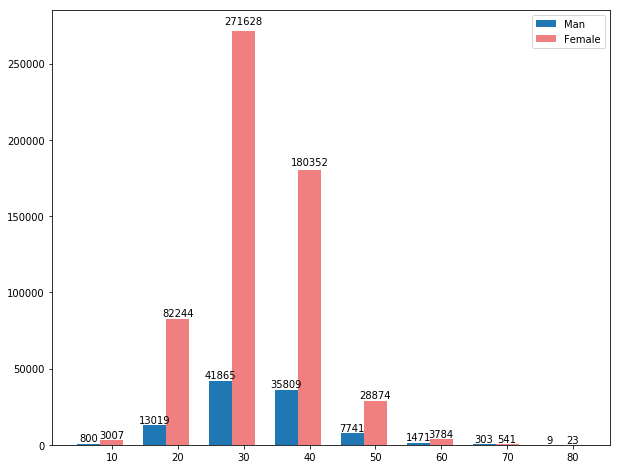

In [88]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 8
man_cnt = cusinfo_table.iloc[1]
female_cnt = cusinfo_table.iloc[0]
 
# create plot
fig, ax = plt.subplots(figsize=(10,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1
 
rects1 = plt.bar(index, man_cnt, bar_width, alpha=opacity, label='Man')
rects2 = plt.bar(index + bar_width, female_cnt, bar_width, color='lightcoral', label='Female')
 
labels = ['10','20','30','40','50','60','70','80']
plt.xticks(index + bar_width, labels)
plt.legend()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [57]:
a0=m2.loc[(m2['CLNT_GENDER']=='M') & (m2['CLNT_AGE']==10)]
a1=m2.loc[(m2['CLNT_GENDER']=='F') & (m2['CLNT_AGE']==10)]
a2=m2.loc[(m2['CLNT_GENDER']=='M') & (m2['CLNT_AGE']==20)]
a3=m2.loc[(m2['CLNT_GENDER']=='F') & (m2['CLNT_AGE']==20)]
a4=m2.loc[(m2['CLNT_GENDER']=='M') & (m2['CLNT_AGE']==30)]
a5=m2.loc[(m2['CLNT_GENDER']=='F') & (m2['CLNT_AGE']==30)]
a6=m2.loc[(m2['CLNT_GENDER']=='M') & (m2['CLNT_AGE']==40)]
a7=m2.loc[(m2['CLNT_GENDER']=='F') & (m2['CLNT_AGE']==40)]
a8=m2.loc[(m2['CLNT_GENDER']=='M') & (m2['CLNT_AGE']==50)]
a9=m2.loc[(m2['CLNT_GENDER']=='F') & (m2['CLNT_AGE']==50)]
a10=m2.loc[(m2['CLNT_GENDER']=='M') & (m2['CLNT_AGE']==60)]
a11=m2.loc[(m2['CLNT_GENDER']=='F') & (m2['CLNT_AGE']==60)]
a12=m2.loc[(m2['CLNT_GENDER']=='M') & (m2['CLNT_AGE']==70)]
a13=m2.loc[(m2['CLNT_GENDER']=='F') & (m2['CLNT_AGE']==70)]
a14=m2.loc[(m2['CLNT_GENDER']=='M') & (m2['CLNT_AGE']==80)]
a15=m2.loc[(m2['CLNT_GENDER']=='F') & (m2['CLNT_AGE']==80)]

In [6]:
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

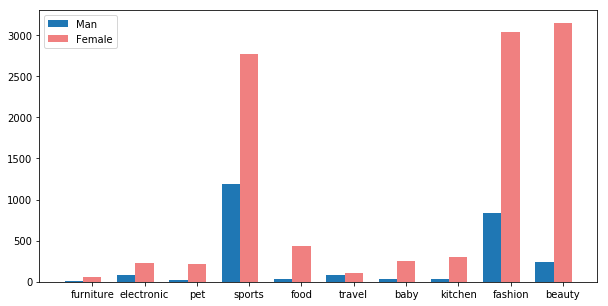

In [63]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 10
man_cnt = a0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
female_cnt = a1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
 
# create plot
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1
 
rects1 = plt.bar(index, man_cnt, bar_width, alpha=opacity, label='Man')
rects2 = plt.bar(index + bar_width, female_cnt, bar_width, color='lightcoral', label='Female')
 
# plt.xlabel('')
# plt.ylabel('')
# plt.title('')
plt.xticks(index + bar_width, labels)
plt.legend()
plt.show()

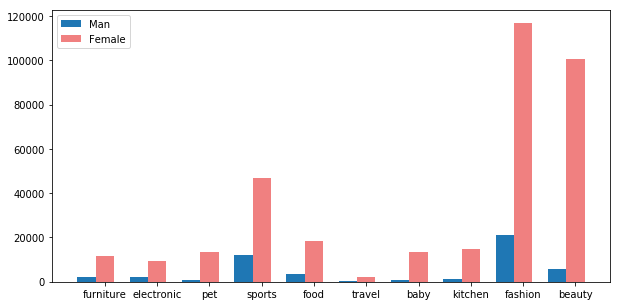

In [65]:
# data to plot
n_groups = 10
man_cnt = a2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
female_cnt = a3[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
 
# create plot
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1
 
rects1 = plt.bar(index, man_cnt, bar_width, alpha=opacity, label='Man')
rects2 = plt.bar(index + bar_width, female_cnt, bar_width, color='lightcoral', label='Female')
 
plt.xticks(index + bar_width, labels)
plt.legend(loc="upper left")
plt.show()

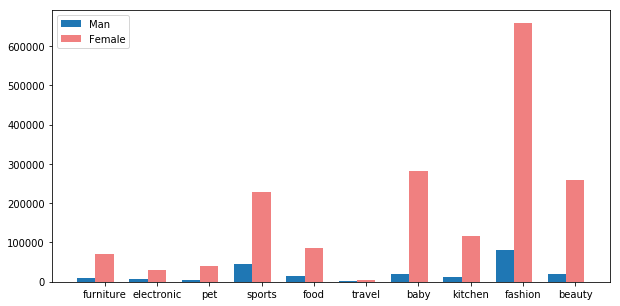

In [66]:
# data to plot
n_groups = 10
man_cnt = a4[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
female_cnt = a5[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
 
# create plot
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1
 
rects1 = plt.bar(index, man_cnt, bar_width, alpha=opacity, label='Man')
rects2 = plt.bar(index + bar_width, female_cnt, bar_width, color='lightcoral', label='Female')
 
plt.xticks(index + bar_width, labels)
plt.legend(loc="upper left")
plt.show()

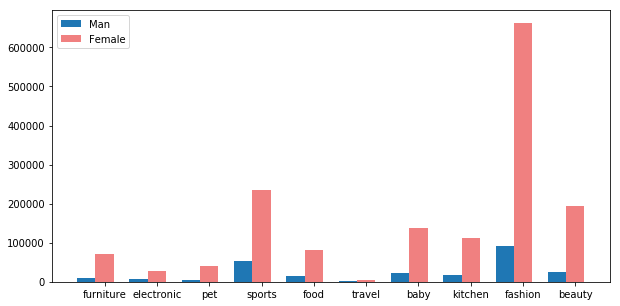

In [67]:
# data to plot
n_groups = 10
man_cnt = a6[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
female_cnt = a7[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
 
# create plot
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1
 
rects1 = plt.bar(index, man_cnt, bar_width, alpha=opacity, label='Man')
rects2 = plt.bar(index + bar_width, female_cnt, bar_width, color='lightcoral', label='Female')
 
plt.xticks(index + bar_width, labels)
plt.legend(loc="upper left")
plt.show()

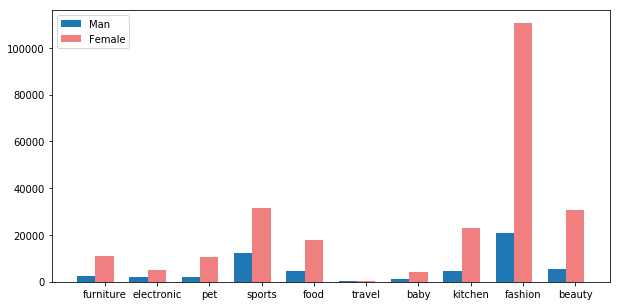

In [68]:
# data to plot
n_groups = 10
man_cnt = a8[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
female_cnt = a9[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
 
# create plot
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1
 
rects1 = plt.bar(index, man_cnt, bar_width, alpha=opacity, label='Man')
rects2 = plt.bar(index + bar_width, female_cnt, bar_width, color='lightcoral', label='Female')
 
plt.xticks(index + bar_width, labels)
plt.legend(loc="upper left")
plt.show()

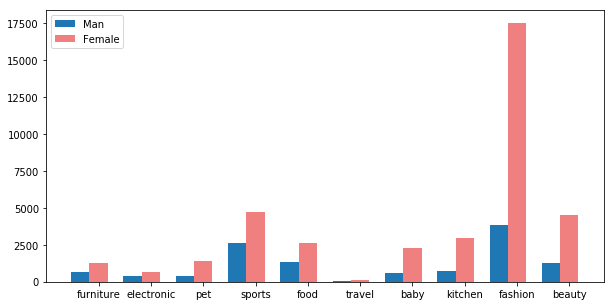

In [76]:
# data to plot
n_groups = 10
man_cnt = a10[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum() + a12[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum() + a14[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
female_cnt = a11[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum() + a13[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum() + a15[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
 
# create plot
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1
 
rects1 = plt.bar(index, man_cnt, bar_width, alpha=opacity, label='Man')
rects2 = plt.bar(index + bar_width, female_cnt, bar_width, color='lightcoral', label='Female')
 
plt.xticks(index + bar_width, labels)
plt.legend(loc="upper left")
plt.show()

In [11]:
kwd1=pd.read_csv('search1.csv')
kwd2=pd.read_csv('search2.csv')

In [42]:
count_list = list([list(x) for x in kwd1['KWD_NM'].value_counts().reset_index().values])
count_list = dict(count_list)
count_list2 = list([list(x) for x in kwd2['KWD_NM'].value_counts().reset_index().values])
count_list2 = dict(count_list2)

# 구매로 이어진 검색어 word cloud

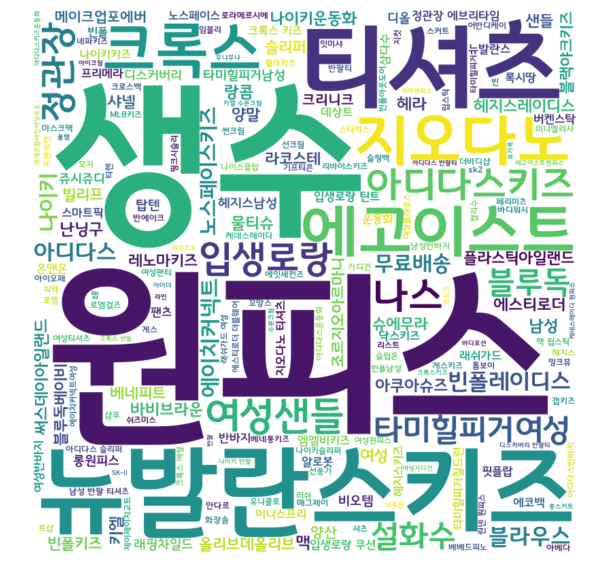

In [41]:
font_path = 'C:/Users/pj903/Downloads/gyeonggi/gyeonggi/Title_Medium.otf'
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies(count_list)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 구매로 이어지지 않은 검색어 word cloud

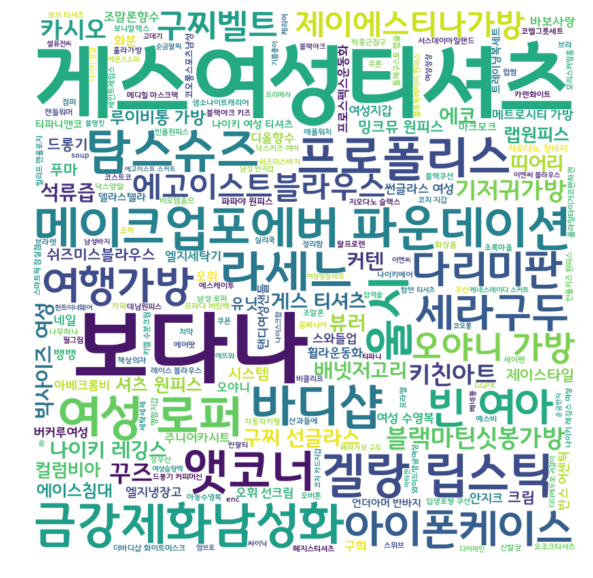

In [43]:
font_path = 'C:/Users/pj903/Downloads/gyeonggi/gyeonggi/Title_Medium.otf'
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies(count_list2)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 월별 word cloud

In [45]:
brand=pd.read_csv('Search1_brand.csv')
brand.head()

C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT,brand_name
0,5607714,7112876,빌리프 아이크림,6,빌리프
1,5607714,4090791,프리메라 마스크팩,3,프리메라
2,5607714,4090791,여성청결제,1,NaN
3,5612428,1876482,명품가방,1,NaN
4,5612428,658123,콩순이 아이스크림,1,콩순이


In [46]:
count_list3 = list([list(x) for x in brand['brand_name'].value_counts().reset_index().values])
count_list3 = dict(count_list3)

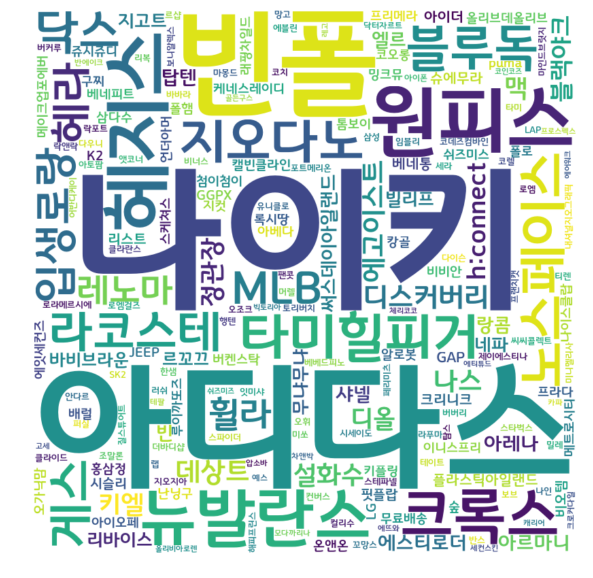

In [47]:
font_path = 'C:/Users/pj903/Downloads/gyeonggi/gyeonggi/Title_Medium.otf'
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies(count_list3)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()